In [2]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)   # Tensorflow의 버전을 출력

2.2.0


In [3]:
# PIL 라이브러리가 설치되어 있지 않다면 설치
!pip install pillow   

from PIL import Image
import os, glob

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


**이미지 불러와서 28x28사이즈로 변경하기**

In [8]:
import os
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/Desktop/Changhee/Exploration/E1_RockScissorsPaper/scissor"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("가위 이미지 resize 완료!")

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path=os.getenv("HOME") + "/Desktop/Changhee/Exploration/E1_RockScissorsPaper/rock"
print("이미지 디렉토리 경로 : ", image_dir_path)

images = glob.glob(image_dir_path + "/*.jpg")

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
# [[YOUR CODE]]
target_size=(28,28)
for img in images:
  old_img=Image.open(img)
  new_img=old_img.resize(target_size, Image.ANTIALIAS)
  new_img.save(img,"JPEG")

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path=os.getenv("HOME") + "/Desktop/Changhee/Exploration/E1_RockScissorsPaper/paper"
print("이미지 디렉토리 경로 : ", image_dir_path)

images = glob.glob(image_dir_path + "/*.jpg")

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
# [[YOUR CODE]]
target_size=(28,28)
for img in images:
  old_img=Image.open(img)
  new_img=old_img.resize(target_size, Image.ANTIALIAS)
  new_img.save(img,"JPEG")

이미지 디렉토리 경로:  /home/aiffel/Desktop/Changhee/Exploration/E1_RockScissorsPaper/scissor
가위 이미지 resize 완료!
이미지 디렉토리 경로 :  /home/aiffel/Desktop/Changhee/Exploration/E1_RockScissorsPaper/rock
이미지 디렉토리 경로 :  /home/aiffel/Desktop/Changhee/Exploration/E1_RockScissorsPaper/paper


**가위=0, 바위=1, 보=2 로 Labeling 하기**

In [6]:
def load_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=300   # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/Desktop/Changhee/Exploration/E1_RockScissorsPaper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 0 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


**이미지 확인해보기**

라벨:  2


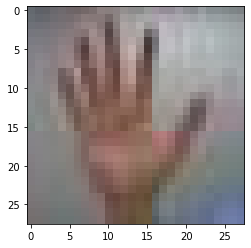

In [10]:
import matplotlib.pyplot as plt
plt.imshow(x_train[250])
print('라벨: ', y_train[250])

In [16]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# model을 직접 만들어 보세요.
n_channel_1=20
n_channel_2=40
n_dense=40
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요? RGB 이미지, 3차원

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 20)        560       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 20)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 40)        7240      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 40)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 40)                40040     
_________________________________________________________________
dense_3 (Dense)              (None, 3)                

**딥러닝 네트워크 설계하기**
![DeepLearning%20Network_info.png](./DeepLearning%20Network_info.png)

**딥러닝 네트워크 학습시키기**

In [17]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
10/10 [==============================] - 0s 2ms/step - loss: 1.0930 - accuracy: 1.0000
Epoch 2/10
10/10 [==============================] - 0s 2ms/step - loss: 1.0798 - accuracy: 1.0000
Epoch 3/10
10/10 [==============================] - 0s 1ms/step - loss: 1.0666 - accuracy: 1.0000
Epoch 4/10
10/10 [==============================] - 0s 1ms/step - loss: 1.0536 - accuracy: 1.0000
Epoch 5/10
10/10 [==============================] - 0s 1ms/step - loss: 1.0408 - accuracy: 1.0000
Epoch 6/10
10/10 [==============================] - 0s 2ms/step - loss: 1.0280 - accuracy: 1.0000
Epoch 7/10
10/10 [==============================] - 0s 1ms/step - loss: 1.0154 - accuracy: 1.0000
Epoch 8/10
10/10 [==============================] - 0s 2ms/step - loss: 1.0029 - accuracy: 1.0000
Epoch 9/10
10/10 [==============================] - 0s 1ms/step - loss: 0.9905 - accuracy: 1.0000
Epoch 10/10
10/10 [==============================] - 0s 1ms/step - loss: 0.9783 - accuracy: 1.0000


**테스트 하기**   
테스트 데이터 준비

In [18]:
def load_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=300   # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_test)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/Desktop/Changhee/Exploration/정상원rock_scissor_paper/rock_scissor_paper"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_test)의 이미지 개수는 0 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


**정확도 측정**

In [19]:
test_loss, test_accuracy = model.evaluate(x_test,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 0.9713 - accuracy: 1.0000
test_loss: 0.9712845087051392 
test_accuracy: 1.0
